## Smart Trash Containers - most environmentally friendly neighborhood

Introduction: This personal notebook is looking for which neighborhood has the most smart trash cans per acre of area. I started by finding the neighborhoods that have the most smart trash cans and then incorporated the acreage of each neighborhood to calculate a ratio of the amount of smart trash cans to acreage in each neighborhood. 

Metric(my personal notebook): The neighborhood with the largest ratio is the most environmentally friendly and the neighborhood with the lowest ratio is the least environmentally friendly. 

In [3]:
# imported pandas, numpy, and matplotlib
# read the .csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
trash = pd.read_csv('PittsburghSmartTrash.csv')

In [4]:
# current top 10 items on street list
trash['neighborhood'].head(10)

0       Central Northside
1       Central Northside
2        Allegheny Center
3       Central Northside
4    California-Kirkbride
5      Marshall-Shadeland
6    California-Kirkbride
7        Allegheny Center
8              Manchester
9             Perry North
Name: neighborhood, dtype: object

In [5]:
# total number of smart trash cans
trash['neighborhood'].count()

1208

In [6]:
## find where most smart trash cans are
trash['neighborhood'].value_counts()

Shadyside              77
East Liberty           68
Squirrel Hill South    64
Bloomfield             59
South Side Flats       56
                       ..
St. Clair               1
Mt. Oliver              1
Oakwood                 1
Swisshelm Park          1
Bedford Dwellings       1
Name: neighborhood, Length: 79, dtype: int64

In [7]:
# data grouped together by the neighborhood
trash.groupby('neighborhood').count()

,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,dpw_division,council_district,ward,fire_zone,x,y
neighborhood,,,,,,,,,,,,,,,
Allegheny Center,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Allegheny West,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Allentown,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Arlington,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Banksville,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
West End,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
West Oakland,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


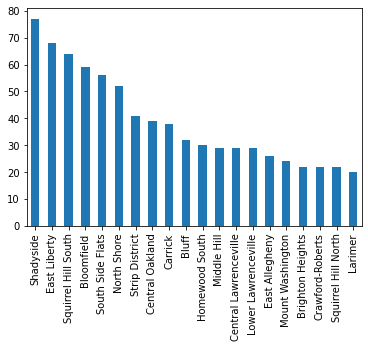

In [8]:
# plotted top 20 (most smart trash cans)
trash['neighborhood'].value_counts().head(20).plot.bar()

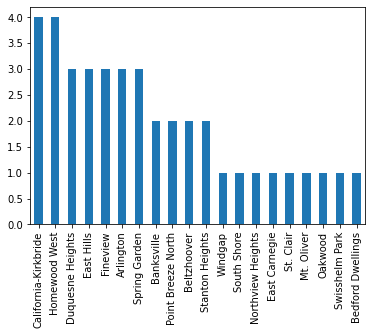

In [10]:
# plotted bottom 20 (least smart trash cans)
trash['neighborhood'].value_counts().tail(20).plot.bar()

In [11]:
# imported neighborhoods to get ratio of # of smart trash cans to acres of area
hood = pd.read_csv('neighborhoods.csv')

#created a new table called g which just has the neighborhoods and the acres
grouped_df = hood.groupby( [ "hood", "acres"] )
g = pd.DataFrame(grouped_df.size())
g.drop(columns=0)
g.sort_values('acres', ascending=False)
g.reset_index()

,hood,acres,0
0,Allegheny Center,134.703,1
1,Allegheny West,90.841,1
2,Allentown,189.608,1
3,Arlington,302.320,1
4,Arlington Heights,84.592,1
...,...,...,...
85,Upper Lawrenceville,260.349,1
86,West End,128.679,1
87,West Oakland,138.372,1
88,Westwood,445.009,1


In [12]:
#created a new table merging the two together and calculating the ratio
new_df= trash.sort_values(["neighborhood"], ascending=False)

#cuts the hood table into just 2 columns and then resets the index
sort = hood.sort_values(by = "hood")
sorted = sort[['hood','acres']]
new = sorted.reset_index(drop=True)

#merges the two tables together after resetting index and counting the frequency
n =trash['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='frequency')
df = n.sort_values(["neighborhood"], ascending=True)
s = df.reset_index(drop=True)
merge = s.merge(new, left_on = 'neighborhood', right_on = 'hood', suffixes=('frequency', 'acres'))
#dividing the frequency and acres to get the ratio
merge['ratio'] = merge['frequency']/merge['acres']
#sorting it based off of the ratio
finalresult = merge.sort_values(["ratio"], ascending=False)
#dropping the hood column
finalresult= finalresult.drop(columns='hood')
true = finalresult.drop(labels=51) ## to take out Perry North since it is 0 acres, causing an infinite number
true

,neighborhood,frequency,acres,ratio
48,North Shore,52,195.014,0.266648
17,Central Oakland,39,180.883,0.215609
25,East Liberty,68,373.650,0.181988
28,Friendship,12,68.297,0.175703
22,East Allegheny,26,151.705,0.171385
...,...,...,...,...
68,Stanton Heights,2,472.615,0.004232
78,Windgap,1,266.678,0.003750
23,East Carnegie,1,277.895,0.003598
70,Swisshelm Park,1,308.575,0.003241


In [13]:
# printing out top 20 neighborhoods with highest ratio
true.head(20)

,neighborhood,frequency,acres,ratio
48,North Shore,52,195.014,0.266648
17,Central Oakland,39,180.883,0.215609
25,East Liberty,68,373.650,0.181988
28,Friendship,12,68.297,0.175703
22,East Allegheny,26,151.705,0.171385
1,Allegheny West,14,90.841,0.154115
9,Bluff,32,210.510,0.152012
43,Middle Hill,29,196.108,0.147878
20,Crawford-Roberts,22,166.101,0.132450
8,Bloomfield,59,451.405,0.130703


In [14]:
#printing out botttom 20 neighborhoods with highest ratio
true.tail(20)

,neighborhood,frequency,acres,ratio
77,Westwood,5,445.009,0.011236
38,Lincoln Place,7,632.497,0.011067
54,Point Breeze North,2,183.781,0.010883
52,Perry South,6,581.656,0.010315
3,Arlington,3,302.320,0.009923
64,Spring Hill-City View,4,404.765,0.009882
5,Bedford Dwellings,1,115.252,0.008677
24,East Hills,3,348.077,0.008619
6,Beechview,8,938.804,0.008521
21,Duquesne Heights,3,400.468,0.007491


[Text(0, 0.5, 'Ratios(amount/acres)'), Text(0.5, 0, 'Neighborhoods')]

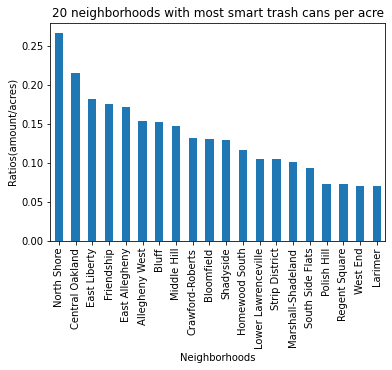

In [15]:
# created a bar graph with the top 20 neighborhoods based on the ratio
r = true.drop(columns='frequency')
t = r.drop(columns='acres')
ax = t.head(20).plot(kind="bar",legend=False, title="20 neighborhoods with most smart trash cans per acre")
ax.set_xticklabels(t['neighborhood'].head(20))
ax. set(xlabel="Neighborhoods", ylabel="Ratios(amount/acres)") 

[Text(0, 0.5, 'Ratios(amount/acres)'), Text(0.5, 0, 'Neighborhoods')]

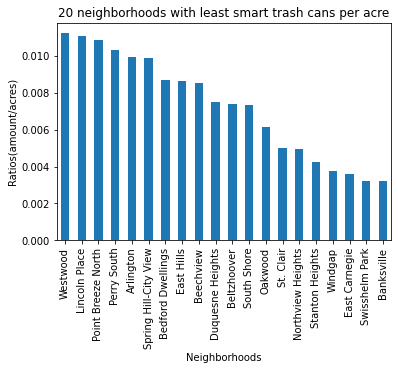

In [16]:
# created a bar graph with the bottom 20 neighborhoods based on the ratio
ax2 = t.tail(20).plot(kind="bar",legend=False, title="20 neighborhoods with least smart trash cans per acre")
ax2.set_xticklabels(t['neighborhood'].tail(20))
ax2. set(xlabel="Neighborhoods", ylabel="Ratios(amount/acres)") 

In [20]:
# getting it in context of neighborhood
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
map = neighborhoods.merge(true, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
map[['neighborhood','ratio']].head()

,neighborhood,ratio
0,Central Oakland,0.215609
1,North Oakland,0.046776
2,West Oakland,0.065042
3,Crawford-Roberts,0.132450
4,Strip District,0.104896


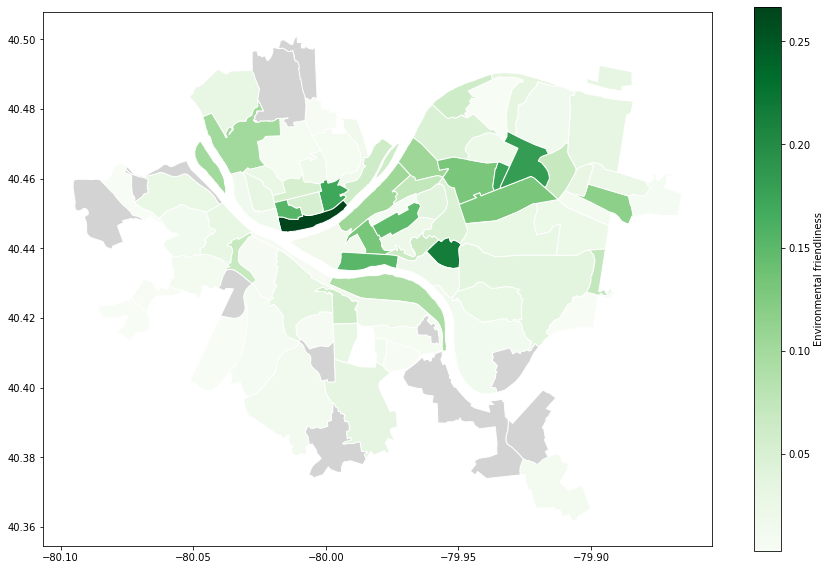

In [19]:
# chloropleth map of pittsburgh
map.plot(column='ratio', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Environmental friendliness"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

This shows that according to the metric of smart trash cans alone North Shore is the most environmentally friendly neighborhood in Pittsburgh and Banksville is the least environmentally friendly. Smart trash cans allow for the most effective collections which reduces trash truck pollution and the pollution on the streets. Becuase North Shore has the largest smart trash can to acre ratio, it is the most environmentally friendly. Similarly, because Banksville has the least smart trash can to acre ratio, it is the least environmentally friendly. 